In [1]:
# import zipfile
# with zipfile.ZipFile('./collectedimages_Jojangandha.zip', 'r') as zip_ref:
#     zip_ref.extractall('./images')

In [1]:
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import keras

In [51]:
print(tf.__version__)

2.16.1


In [52]:
print(keras.__version__)

3.0.5


In [3]:
PATH = './images'
CLASS_NAMES = [ 'i_love_you', 'please', 'water', 'welcome']
BATCH_SIZE = 32

Splitting the dataset into train, test and validation

In [4]:
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import splitfolders
import os
print(os.listdir(PATH))

['test', 'train']


In [7]:
# splitfolders.ratio(PATH,seed=1337, output='Split_Data', ratio=(0.6, 0.2, 0.2))

Prepare the dataset for training

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(
    'images/train',
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    interpolation='bilinear'
)

Found 86 files belonging to 4 classes.


In [9]:
# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#     "Split_Data/val/",
#     labels='inferred',
#     label_mode='int',
#     class_names=CLASS_NAMES,
#     color_mode='rgb',
#     batch_size=BATCH_SIZE,
#     image_size=(180, 180),
#     shuffle=True,
#     seed=123,
#     interpolation='bilinear'
# )

Found 29 files belonging to 5 classes.


In [5]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "images/test/",
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    interpolation='bilinear'
)

Found 34 files belonging to 4 classes.


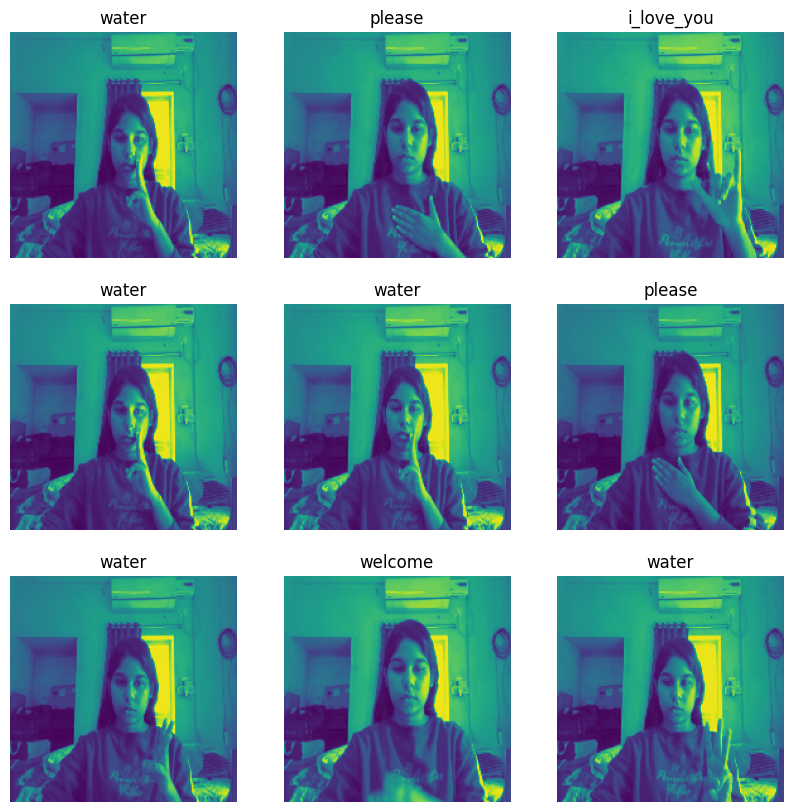

In [6]:
import matplotlib.pyplot as plt

class_names = ['i_love_you', 'please', 'water', 'welcome']
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [21]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 1)),
    layers.Conv2D(16, 1, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 1, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 1, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4)
])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,968,260 (15.14 MB)

 Trainable params: 3,968,260 (15.14 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [30]:
history = model.fit(
  dataset,
  batch_size=BATCH_SIZE,
  # test_dataset = test_dataset,
  epochs=10
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9221 - loss: 0.4530
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9202 - loss: 0.4038
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8424 - loss: 0.3940
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9377 - loss: 0.3711
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9007 - loss: 0.3579
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9261 - loss: 0.3388
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9611 - loss: 0.2845
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9533 - loss: 0.2778
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9727 - loss: 0.2590
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9708 - loss: 0.2153


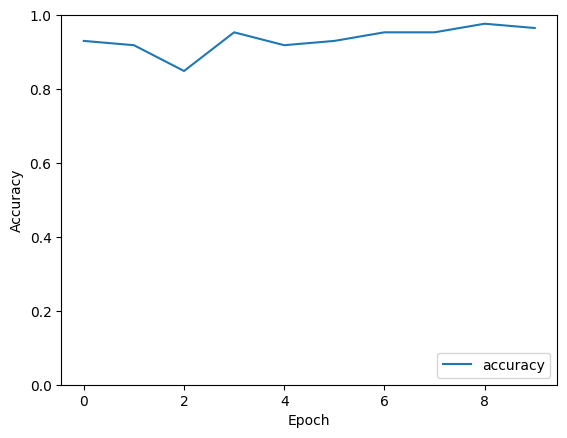

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Testing


In [33]:
test_accuracy = model.evaluate(test_dataset,steps=750)

750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.8235 - loss: 0.3273  


In [17]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import cv2

In [60]:
TEST_IMAGE_PATH = './images/test/welcome/welcome.5328974e-bceb-11ee-8fe3-346f24d13324.jpg'

In [61]:
image_size = (180,180)

In [62]:
test_image = cv2.resize(cv2.imread(TEST_IMAGE_PATH, cv2.IMREAD_GRAYSCALE),  image_size)

In [63]:
test_image = np.array(test_image).reshape( -1, 180, 180, 1)

In [64]:
import numpy as np
from keras import models

In [48]:
import cv2

In [65]:
predictions = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [66]:
predictions

array([[-4.6272945, -0.9490556, -3.2937615,  2.4801748]], dtype=float32)

In [67]:
probab = predictions[0]

In [68]:
list(probab).index(max(probab))

3

In [69]:
pred_class = list(probab).index(max(probab))
pred_class

3

In [70]:
predictions = np.array(predictions)

predicted_class_index = np.argmax(predictions[0])

# Find the index of the maximum value in the array
#predicted_class_index = np.argmax(predictions)

# Output the predicted class index
print("Predicted class index:", predicted_class_index)

#food', 'house', 'how', 'what', 'who
if predicted_class_index==0: 
    print(f'Predicted class is i_love_you')
elif predicted_class_index==1:
    print(f'Predicted class is please')
elif predicted_class_index==2:
    print(f'Predicted class is water')
elif predicted_class_index==3:
    print(f'Predicted class is welcome')

Predicted class index: 3
Predicted class is welcome


In [71]:
model.save('cnn_10ep_jo_acc97_testac_82_gray.h5')

In [72]:
model.save('cnn_10ep_jo_acc97_testac_82_gray.keras')